In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

from manage import (
    logging,
    TRAINING_DATA_FILE,
    EMBEDDINGS_SEQ_FILE,
    EMBEDDINGS_MUT_FILE,
    MUTATION_SCORES_FILE,
    SEQUENCE_MUTATION_PLOT,
    SEQUENCE_EMBEDDINGS_PLOT,
    plot_umap,
)


In [2]:
logging.info("Loading data..")

seq_mut = pd.read_feather(TRAINING_DATA_FILE)
seq_embbeddings = pd.read_csv(EMBEDDINGS_SEQ_FILE, index_col=0)
mut_embbedings = pd.read_csv(EMBEDDINGS_MUT_FILE, index_col=0)
mutation_scores = pd.read_csv(MUTATION_SCORES_FILE, index_col=0)


[2022-01-11 05:14:13 PM]: Loading data..


In [6]:
mutation_scores

,Spike_A1015T,Spike_A1016S,Spike_A1020S,Spike_A1020V,Spike_A1022S,Spike_A1026P,Spike_A1026S,Spike_A1026T,Spike_A1056G,Spike_A1056S,...,Spike_Y837H,Spike_Y837L,Spike_Y873N,Spike_Y904H,Spike_Y917F,Spike_Y917H,Spike_Y917S,Spike_Y91H,Spike_Y91S,Spike_Y91del
EPI_ISL_1001043,5.154133e-19,4.601923e-22,2.273808e-09,2.960705e-20,2.944084e-11,3.967717e-19,1.847276e-15,3.664057e-18,1.708972e-16,5.776909e-06,...,3.469130e-08,1.261844e-12,6.857793e-03,7.534560e-08,1.913844e-05,2.216348e-14,9.814514e-07,3.806225e-18,2.375776e-18,2.202202e-18
EPI_ISL_1009317,1.030766e-11,6.428962e-15,1.813039e-09,1.137489e-14,9.930924e-05,2.632694e-12,5.947846e-08,1.069192e-13,1.983592e-16,3.369771e-09,...,4.158903e-06,2.714261e-07,2.013778e-05,2.158964e-02,2.178407e-13,2.639176e-15,7.850060e-05,2.210552e-17,6.880499e-09,2.891425e-13
EPI_ISL_1009326,1.275425e-13,3.238244e-06,6.312796e-08,2.750534e-30,1.096201e-22,2.316940e-09,2.453796e-23,3.176000e-11,1.569248e-14,2.146881e-13,...,1.006530e-21,1.081095e-18,7.226853e-07,8.423821e-11,5.114744e-12,2.346908e-13,4.560276e-08,7.391743e-20,4.129934e-17,1.862175e-09
EPI_ISL_1015010,2.680225e-23,5.311500e-26,6.572733e-17,2.619974e-24,2.097311e-11,5.972003e-23,1.374739e-11,1.342259e-21,2.989158e-19,9.327398e-22,...,4.995985e-03,6.217299e-06,1.287002e-15,1.914864e-11,1.331933e-18,9.755828e-18,1.872780e-08,6.441452e-24,2.904143e-24,1.959770e-26
EPI_ISL_1015065,1.083317e-16,5.328368e-17,3.068144e-07,1.253229e-23,3.581948e-13,2.790186e-14,1.493878e-14,1.751227e-17,4.633921e-19,1.389249e-06,...,6.690083e-13,5.908015e-15,1.514602e-04,6.977120e-08,7.798504e-01,5.558087e-11,5.559841e-06,2.309453e-20,1.056565e-15,3.388444e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spike_Y917H,4.381426e-03,1.374418e-05,1.659713e-03,6.684376e-22,4.879974e-08,1.384300e-02,1.053941e-10,2.278988e-02,1.897914e-14,9.101363e-04,...,1.223980e-08,1.659668e-06,7.879848e-06,1.694863e-01,9.186020e-01,9.997644e-01,1.009740e-03,4.079844e-16,6.513483e-08,9.981204e-01
Spike_Y917S,3.057301e-06,9.145698e-15,1.442827e-05,9.129900e-24,8.371217e-05,6.527041e-06,3.225631e-06,1.879189e-08,4.822495e-16,3.484356e-07,...,9.428065e-05,1.923183e-02,3.761568e-03,9.824640e-01,1.656913e-02,5.539331e-07,9.985887e-01,7.546254e-19,4.130243e-09,2.875895e-07
Spike_Y91H,5.954554e-07,2.641401e-07,9.999998e-01,5.227296e-07,5.651821e-14,2.672685e-07,1.311019e-16,5.979414e-11,9.994994e-01,4.016137e-06,...,3.632010e-17,2.076538e-14,8.186591e-04,6.121536e-08,2.484587e-08,7.242951e-10,2.431529e-13,9.993259e-01,3.634020e-06,4.008484e-06
Spike_Y91S,2.368155e-01,2.328475e-05,1.451374e-03,5.045390e-11,3.628942e-04,5.672075e-01,1.293666e-06,2.490878e-01,7.082939e-12,4.456054e-04,...,4.086730e-07,2.829753e-01,1.084375e-04,9.040034e-01,2.117303e-04,3.418709e-08,3.625097e-03,1.319158e-13,9.996697e-01,9.190816e-01


[2022-01-11 05:17:59 PM]: Plot trained scores


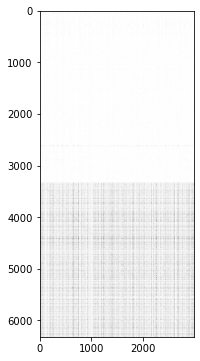

In [14]:
logging.info("Plot trained scores")

mutation_scores = mutation_scores.sort_index()

mutation_scores2plot = StandardScaler().fit_transform(
    mutation_scores.drop("Spike_D614G", axis=1))
mutation_scores2plot = ((mutation_scores2plot > 0) * 1)
# mutation_scores2plot = StandardScaler().fit_transform(mutation_scores2plot)

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6, 6)
)

ax.imshow(mutation_scores2plot, cmap="Greys")
plt.savefig("Plots/mutation_scores_trained.pdf")


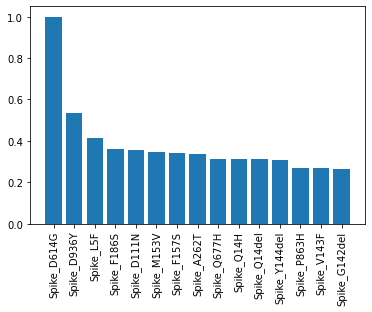

In [16]:
mutation_averge_score = mutation_scores.mean(
    axis=0).sort_values(ascending=False)

plt.bar(mutation_averge_score[:15].index, mutation_averge_score[:15].values)
plt.xticks(rotation=90)
plt.savefig("Plots/mut_rank_trained.pdf", bbox_inches="tight")


[2022-01-11 05:19:06 PM]: Plot original scores


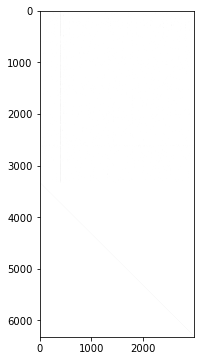

In [17]:
logging.info("Plot original scores")

seq_mutations = seq_mut.pivot_table(
    index="Accession",
    columns="Mutation",
    values="Value",
    fill_value=0
)
# seq_mutations = seq_mutations.drop_duplicates()
seq_mutations = seq_mutations.sort_index()

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6, 6)
)

ax.imshow(np.array(seq_mutations), cmap="Greys")
plt.savefig("Plots/mutation_scores_original.pdf")


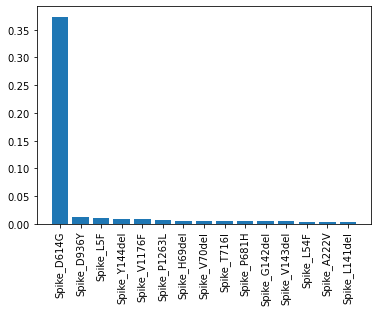

In [19]:
seq_averge_mutations = seq_mutations.mean(axis=0).sort_values(ascending=False)

plt.bar(seq_averge_mutations[:15].index, seq_averge_mutations[:15].values)
plt.xticks(rotation=90)
plt.savefig("Plots/mut_rank_original.pdf", bbox_inches="tight")

[2022-01-11 05:19:53 PM]: Plot sequence pca


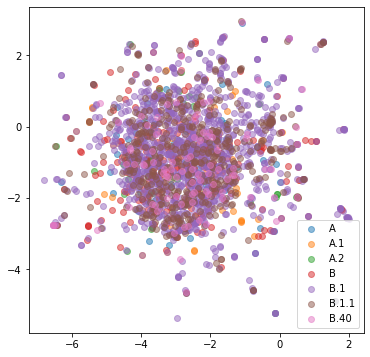

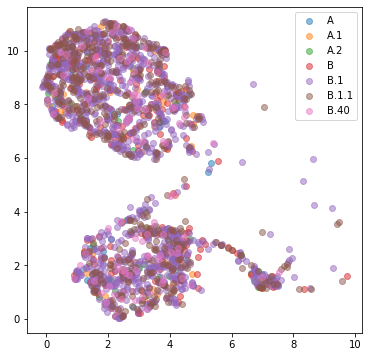

In [20]:
logging.info("Plot sequence pca")

seq_lineage = seq_mut[["Accession", "Lineage"]].drop_duplicates()
seq_lineage = seq_lineage.set_index("Accession")

plot_umap(seq_mutations, seq_lineage, SEQUENCE_MUTATION_PLOT)
plot_umap(seq_embbeddings, seq_lineage, SEQUENCE_EMBEDDINGS_PLOT)
# plot_pca(seq_embbeddings.dot(mut_embbedings.T),
#          seq_lineage, SEQUENCE_EMBEDDINGS_PLOT)
